sko mhuerta

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


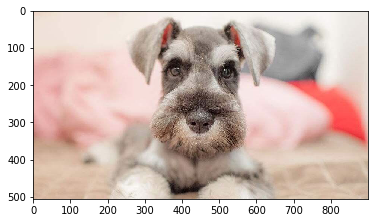

In [0]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

file_path = '/content/drive/My Drive/ References/ecole42/project/rushes/numpy/'
img_original = mpimg.imread(file_path + 'dog.jpg')
plt.imshow(img_original)

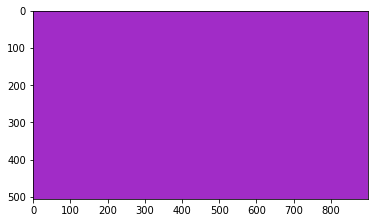

In [0]:
#fill
MAX = (255, 255, 255)
img_zero = np.zeros(img_original.shape, img_original.dtype)
[r, g, b] = [161, 44, 199]
img_fill = img_zero + (r, g, b)
plt.imshow(img_fill)

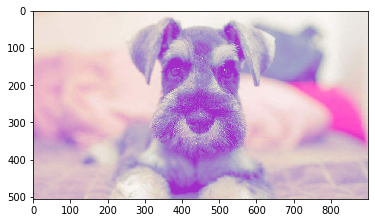

In [0]:
#imagechops.lighter
'''
  Compares the two images, pixel by pixel, and returns a new image containing the lighter values.
  out = max(image1, image2)
  reference:
  https://pillow.readthedocs.io/en/3.1.x/reference/Image.html
'''
img_lighter = np.maximum(img_original, img_fill)
plt.imshow(img_lighter.astype(int))

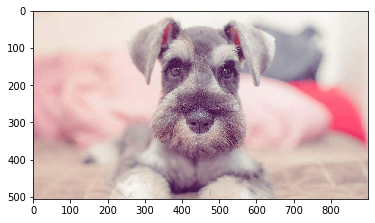

In [0]:
#image blend
'''
  Creates a new image by interpolating between two input images, using a constant alpha.:
  out = image1 * (1.0 - alpha) + image2 * alpha
  reference:
  https://pillow.readthedocs.io/en/3.1.x/reference/Image.html
'''
p = 0.31
img_blend = img_original * (1 - p) + (img_lighter * p)
plt.imshow(img_blend.astype(int))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


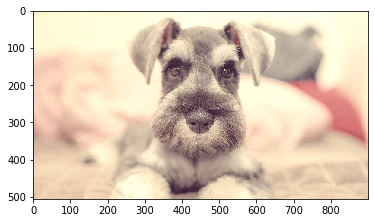

In [0]:
#image sepia
'''
A sepia operation is equivalent to the following matrix operation:
  | R' |     |0.393+0.607s  0.769-0.769s  0.189-0.189s 0  0 |   | R |
  | G' |     |0.349-0.349s  0.686+0.314s  0.168-0.168s 0  0 |   | G |
  | B' |  =  |0.272-0.272g  0.534-0.534g  0.131+0.869g 0  0 | * | B |
  | A' |     |          0             0             0  1  0 |   | A |
  | 1  |     |          0             0             0  0  1 |   | 1 |
  See the W3C document:
  https://www.w3.org/TR/filter-effects-1/#sepiaEquivalent
'''
img_proc = img_blend.astype(int);
image_sepia = np.zeros(img_proc.shape, img_proc.dtype)
s = 0.5
for width in range(img_proc.shape[0]):
    for height in range(img_proc.shape[1]):
        r = img_proc[width, height][0]
        g = img_proc[width, height][1]
        b = img_proc[width, height][2]
        image_sepia[width, height] = [(0.393+0.607*s)*r + (0.769-0.769*s)*g + (0.189-0.189*s)*b,
          (0.349-0.349*s)*r + (0.686+0.314*s)*g + (0.168-0.168*s)*b,
          (0.272-0.272*s)*r + (0.534-0.534*s)*g + (0.131+0.869*s)*b]
plt.imshow(image_sepia)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


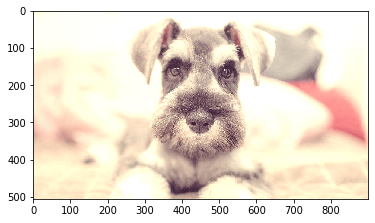

In [0]:
#image contrast
'''
Adjusts the contrast.
  A contrast operation is equivalent to the following matrix operation:
      | R' |     | c  0  0  0  -0.5c+0.5 |   | R |
      | G' |     | 0  c  0  0  -0.5c+0.5 |   | G |
      | B' |  =  | 0  0  c  0  -0.5c+0.5 | * | B |
      | A' |     | 0  0  0  1          0 |   | A |
      | 1  |     | 0  0  0  0          1 |   | 1 |
  See the W3C document:
  https://www.w3.org/TR/filter-effects-1/#contrastEquivalent.
'''
c = 1.15
img_contrast = image_sepia
with np.nditer(img_contrast, op_flags=['readwrite']) as it:
  for x in it:
    x[...] = c * (x - 0.5) + 0.5
plt.imshow(img_contrast.astype(int))

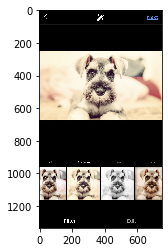

In [0]:
file = file_path + 'brannan_dog.jpg'
img = mpimg.imread(file)
plt.imshow(img)